## Problem Statement- TELECOM CUSTOMER CHURN CASE STUDY

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.mlab as mlab
sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as po
np.warnings=warnings

### Load dataset

In [2]:
customer_churn = pd.read_csv(r"C:\Users\This Pc\Desktop\csv\PROJECTS\Telecom\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
customer_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
customer_churn['Churn'] = customer_churn['Churn'].replace({'Yes':1, "No":0})

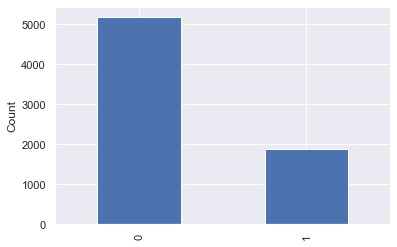

In [7]:
customer_churn['Churn'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

### Exploring Columns

In [8]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

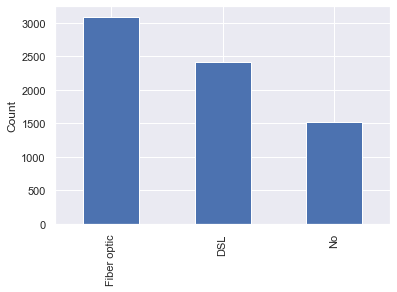

In [9]:
customer_churn['InternetService'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

In [10]:
customer_churn['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [11]:
customer_churn['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [12]:
customer_churn['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [13]:
customer_churn['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [14]:
customer_churn['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [15]:
customer_churn['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [16]:
customer_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [17]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [18]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies']

for values in cols:
    customer_churn[values] = customer_churn[values].replace({"No internet service":"No"})

In [19]:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [20]:
customer_churn['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [21]:
customer_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85     0  
1               Mailed check          56.95        1889.5     0  
2               Mailed check          53.85        108.15     1  
3  Bank transfer (automatic)          42.30       1840.75     0  
4           Electronic check          70.70        151.65     1  

[5 rows x 21 columns]

In [22]:
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(" ", np.nan)
customer_churn = customer_churn[customer_churn['TotalCharges'].notnull()]
customer_churn = customer_churn.reset_index()[customer_churn.columns]
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)

In [24]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [25]:
customer_churn['Churn'].value_counts().unique()

array([5163, 1869], dtype=int64)

In [26]:
churn_x = customer_churn['Churn'].value_counts().keys().tolist()
churn_y = customer_churn['Churn'].value_counts().values.tolist()

fig = px.pie(customer_churn, labels= churn_x, values=churn_y, 
            color_discrete_sequence=['yellow','pink'], hole=0.6)

fig.update_layout(title ="Customer Churn", template ="plotly_dark")
fig.show()

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

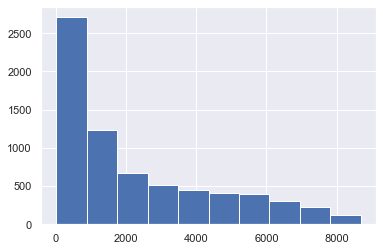

In [27]:
plt.hist(customer_churn['TotalCharges'])

<Figure size 1080x360 with 0 Axes>

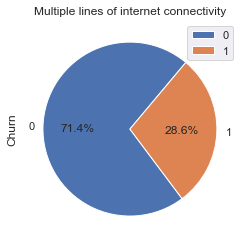

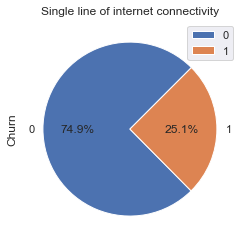

In [28]:
plt.figure(figsize=(15,5))
pie_MultipleLines_Y = pd.DataFrame(customer_churn[customer_churn['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')

pie_MultipleLines_N = pd.DataFrame(customer_churn[customer_churn['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show() 

<Figure size 1080x360 with 0 Axes>

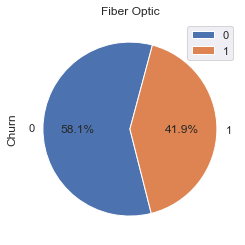

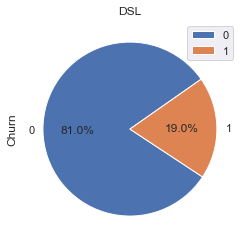

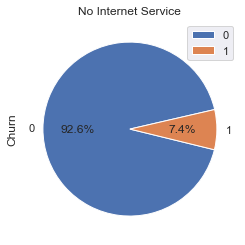

In [29]:
plt.figure(figsize=(15,5))
pie_InternetService_fo = pd.DataFrame(customer_churn[customer_churn['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

pie_InternetService_dsl = pd.DataFrame(customer_churn[customer_churn['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('DSL')
plt.gca().set_aspect('equal')

pie_InternetService_no = pd.DataFrame(customer_churn[customer_churn['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, autopct='%1.1f%%', startangle= 13)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

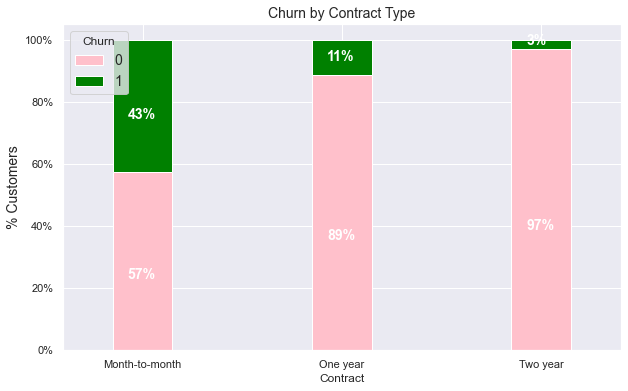

In [30]:
colors = ['pink','green']
contract_churn = customer_churn.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot: xlabel='MonthlyCharges', ylabel='TotalCharges'>

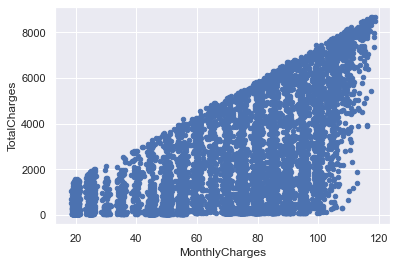

In [31]:
customer_churn[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

In [34]:
for i in customer_churn.columns:
    print("***********************************************",i,
         "*************************************************")
    print()
    print(set(customer_churn[i].tolist()))
    print()

*********************************************** customerID *************************************************

{'8158-WPEZG', '9647-ERGBE', '3748-FVMZZ', '2696-ECXKC', '4324-BZCKL', '3453-RTHJQ', '9436-ZBZCT', '9094-AZPHK', '1092-GANHU', '6384-VMJHP', '3951-NJCVI', '9602-WCXPI', '6817-WTYHE', '8008-ESFLK', '7056-IMHCC', '0440-UEDAI', '0628-CNQRM', '0071-NDAFP', '2480-JZOSN', '9835-ZIITK', '3889-VWBID', '8840-DQLGN', '1803-BGNBD', '7964-VEXDG', '8552-OBVRU', '4871-JTKJF', '0902-RFHOF', '4716-HHKQH', '7787-BNTZM', '7825-ECJRF', '7459-IMVYU', '7945-HLKEA', '5175-AOBHI', '9948-YPTDG', '8225-BTJAU', '1582-RAFML', '4897-QSUYC', '5402-HTOTQ', '4658-HCOHW', '2706-QZIHY', '1319-YLZJG', '8108-UXRQN', '7783-YKGDV', '4450-MDZFX', '8747-UDCOI', '3970-XGJDU', '4550-EVXNY', '3441-CGZJH', '1251-KRREG', '4187-CINZD', '8851-RAGOV', '6461-SZMCV', '2393-DIVAI', '9906-NHHVC', '1730-VFMWO', '9633-DENPU', '5438-QMDDL', '8623-ULFNQ', '1335-MXCSE', '7108-DGVUU', '4145-UQXUQ', '9565-JSNFM', '3217-FZDMN', '8970-A


# One Hot Encoder and Dummy variable required to build model

In [35]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [37]:
customer_churn = pd.get_dummies(customer_churn, columns=['gender','Partner', 
                                                         'Dependents','PhoneService', 
                                                         'MultipleLines', 'InternetService',
                                                         'OnlineSecurity', 'OnlineBackup', 
                                                         'DeviceProtection', 'TechSupport',
                                                         'StreamingTV', 'StreamingMovies', 
                                                         'Contract', 'PaperlessBilling',
                                                         'PaymentMethod'],
                               drop_first=True)

In [38]:
customer_churn.head()

customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0  7590-VHVEG              0       1           29.85         29.85      0   
1  5575-GNVDE              0      34           56.95       1889.50      0   
2  3668-QPYBK              0       2           53.85        108.15      1   
3  7795-CFOCW              0      45           42.30       1840.75      0   
4  9237-HQITU              0       2           70.70        151.65      1   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0            0            1               0                 0  ...   
1            1            0               0                 1  ...   
2            1            0               0                 1  ...   
3            1            0               0                 0  ...   
4            0            0               0                 1  ...   

   DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
0                     0                0                0   
1                     1                0                0   
2                     0                0                0   
3                     1                1                0   
4                     0                0                0   

   StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                    0                  0                  0   
1                    0                  1                  0   
2                    0                  0                  0   
3                    0                  1                  0   
4                    0                  0                  0   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                     1                                      0   
1                     0                                      0   
2                     1                                      0   
3                     0                                      0   
4                     1                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1  
3                               0                           0  
4                               1                           0  

[5 rows x 26 columns]

In [39]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   int64  
 6   gender_Male                            7032 non-null   uint8  
 7   Partner_Yes                            7032 non-null   uint8  
 8   Dependents_Yes                         7032 non-null   uint8  
 9   PhoneService_Yes                       7032 non-null   uint8  
 10  MultipleLines_No phone service         7032 non-null   uint8  
 11  Mult

### Using Standard Scaler 

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = ['tenure','MonthlyCharges','TotalCharges']
customer_churn[scaler_columns] = scaler.fit_transform(customer_churn[scaler_columns])

In [41]:
customer_churn.head()

customerID  SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  \
0  7590-VHVEG              0 -1.280248       -1.161694     -0.994194      0   
1  5575-GNVDE              0  0.064303       -0.260878     -0.173740      0   
2  3668-QPYBK              0 -1.239504       -0.363923     -0.959649      1   
3  7795-CFOCW              0  0.512486       -0.747850     -0.195248      0   
4  9237-HQITU              0 -1.239504        0.196178     -0.940457      1   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0            0            1               0                 0  ...   
1            1            0               0                 1  ...   
2            1            0               0                 1  ...   
3            1            0               0                 0  ...   
4            0            0               0                 1  ...   

   DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
0                     0                0                0   
1                     1                0                0   
2                     0                0                0   
3                     1                1                0   
4                     0                0                0   

   StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                    0                  0                  0   
1                    0                  1                  0   
2                    0                  0                  0   
3                    0                  1                  0   
4                    0                  0                  0   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                     1                                      0   
1                     0                                      0   
2                     1                                      0   
3                     0                                      0   
4                     1                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1  
3                               0                           0  
4                               1                           0  

[5 rows x 26 columns]

<AxesSubplot: >

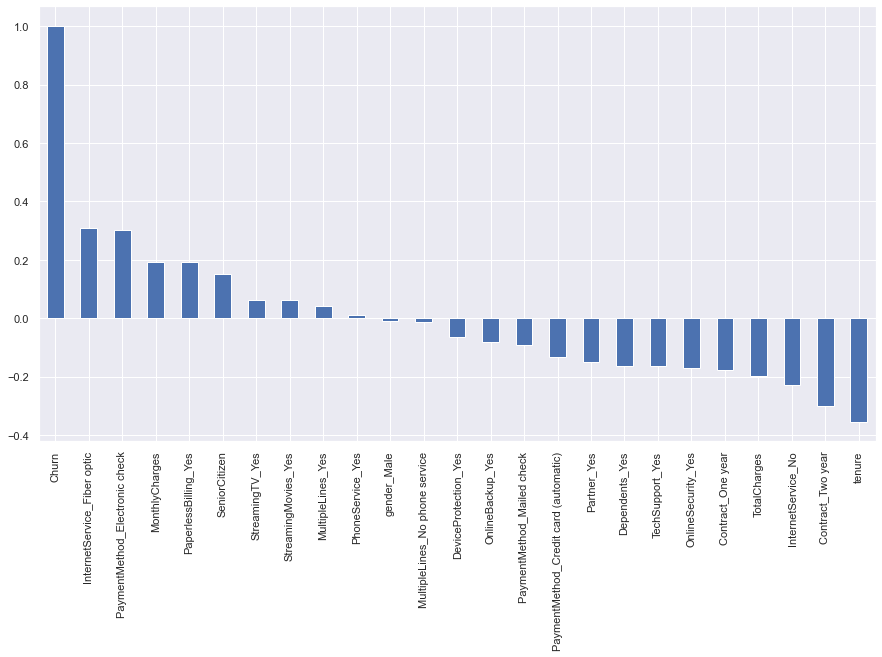

In [42]:
plt.figure(figsize=(15,8))
customer_churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [43]:
# Split the data into independent and dependent variable
x = customer_churn.drop(['customerID','Churn'], axis=1)
y = customer_churn['Churn']

In [44]:
x.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0 -1.280248       -1.161694     -0.994194            0   
1              0  0.064303       -0.260878     -0.173740            1   
2              0 -1.239504       -0.363923     -0.959649            1   
3              0  0.512486       -0.747850     -0.195248            1   
4              0 -1.239504        0.196178     -0.940457            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                               1                  0  ...   
1                               0                  0  ...   
2                               0                  0  ...   
3                               1                  0  ...   
4                               0                  0  ...   

   DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
0                     0                0                0   
1                     1                0                0   
2                     0                0                0   
3                     1                1                0   
4                     0                0                0   

   StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                    0                  0                  0   
1                    0                  1                  0   
2                    0                  0                  0   
3                    0                  1                  0   
4                    0                  0                  0   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                     1                                      0   
1                     0                                      0   
2                     1                                      0   
3                     0                                      0   
4                     1                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1  
3                               0                           0  
4                               1                           0  

[5 rows x 24 columns]

In [45]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Handling imbalance dataset by using SMOTE/Oversampling method

In [46]:
import imblearn

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(x_smote.shape)
print("\n")
print(y_smote.shape)
print('\n')
print(y_smote.value_counts())
print('\n')
print(y.value_counts())

(10326, 24)


(10326,)


0    5163
1    5163
Name: Churn, dtype: int64


0    5163
1    1869
Name: Churn, dtype: int64


# SweetViz

In [48]:
import sweetviz as sv

In [49]:
analysis = sv.analyze(x_smote)

                                             |                                             | [  0%]   00:00 ->…

In [50]:
analysis.show_html('customer_churn.html')

Report customer_churn.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [51]:
 cor=x_smote.corr()

In [52]:
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) >= 0.7:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)


0.8561064960801793 -- 3 -- 1 -- TotalCharges -- tenure
0.9988711676129334 -- 8 -- 7 -- MultipleLines_No phone service -- PhoneService_Yes
0.8026105995578678 -- 10 -- 2 -- InternetService_Fiber optic -- MonthlyCharges
0.7230563832231645 -- 11 -- 2 -- InternetService_No -- MonthlyCharges


In [53]:
print(cor.columns)
print('------')
print(correlated_features)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
------
{'tenure', 'InternetService_No', 'PhoneService_Yes', 'TotalCharges', 'MultipleLines_No phone service', 'InternetService_Fiber optic', 'MonthlyCharges'}


In [54]:
customer_churn.shape

(7032, 26)

In [55]:
customer_churn.shape

(7032, 26)

In [56]:
x_smote.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [57]:
x_smote.shape

(10326, 24)

In [58]:
### Drop column having multicollinearity
x_smote=x_smote.drop(['MultipleLines_No phone service', 'InternetService_Fiber optic', 'TotalCharges', 
                      'InternetService_No', 'tenure', 'MonthlyCharges', 'PhoneService_Yes'],axis=1)

In [59]:
x_smote.columns

Index(['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [60]:
x_smote.shape

(10326, 17)

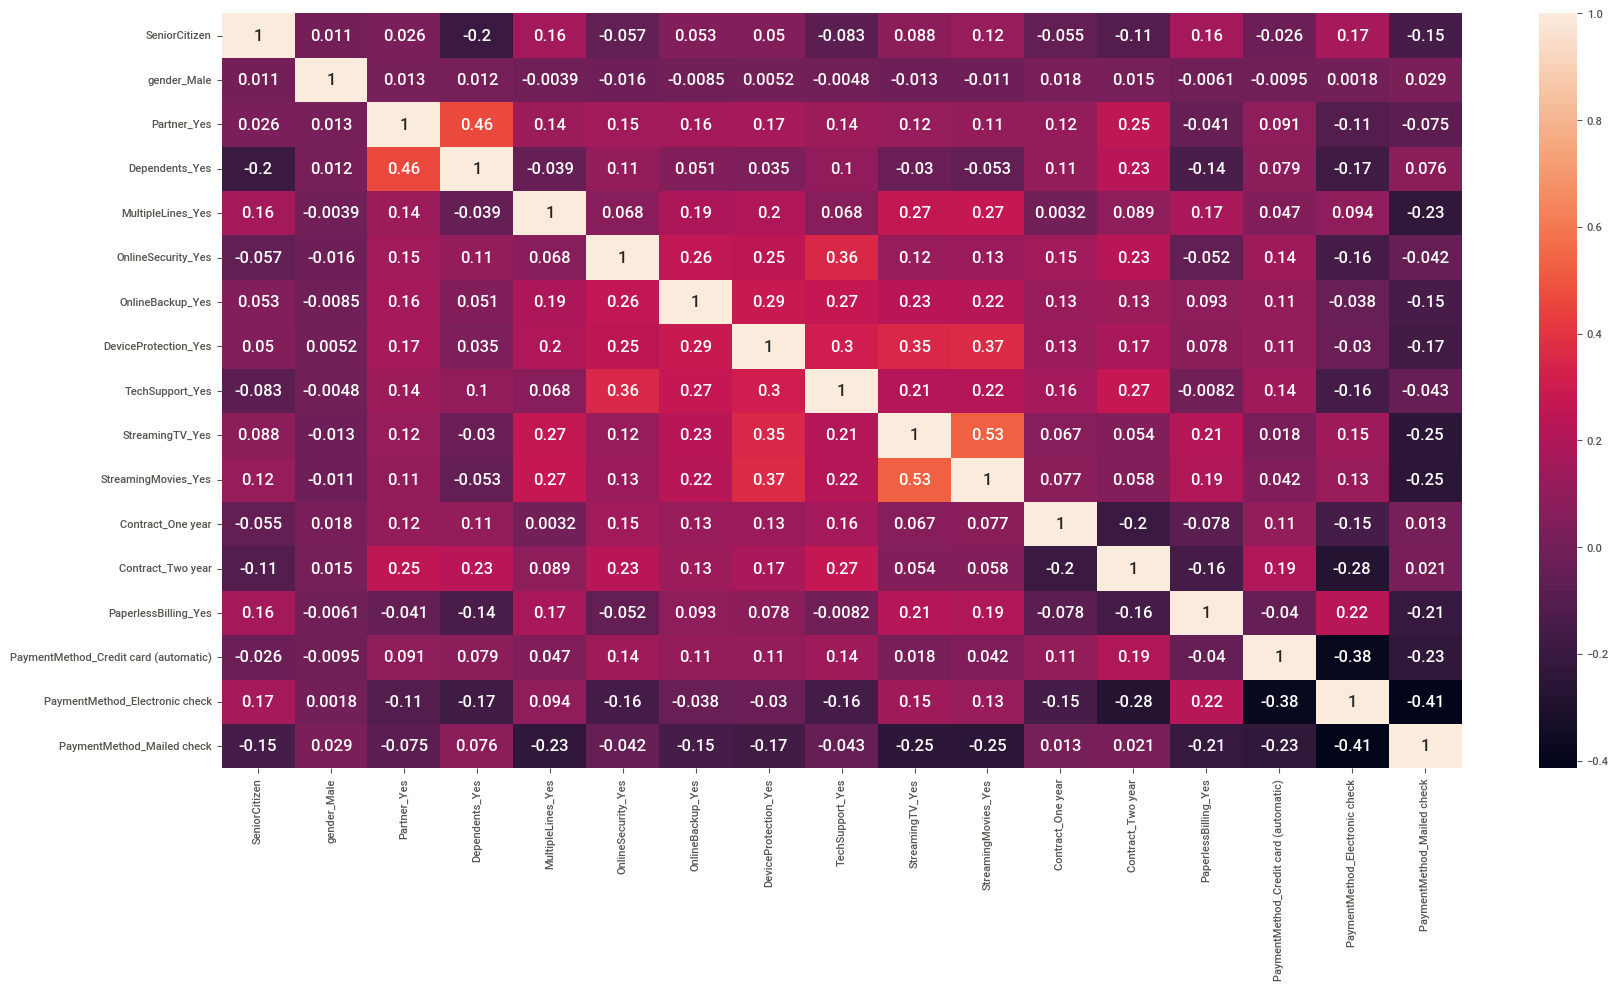

In [61]:
plt.figure(figsize = (20,10))
sns.heatmap(x_smote.corr(),annot = True)
plt.show()

# Splitting the data into training and test for building the model and predicting with test data

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state=121,test_size=.3)

### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [67]:
confusion_matrix(y_test, y_pred_test)

array([[1086,  500],
       [ 297, 1215]], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1586
           1       0.71      0.80      0.75      1512

    accuracy                           0.74      3098
   macro avg       0.75      0.74      0.74      3098
weighted avg       0.75      0.74      0.74      3098



In [69]:
print("Training Accuracy of DecisionTree is {:.2f}%".format(accuracy_score(y_train, y_pred_train)*100))
print("***************"*10)
print("Test Accuracy of DecisionTree is {:.2f}%".format(accuracy_score(y_test, y_pred_test)*100))

Training Accuracy of DecisionTree is 89.47%
******************************************************************************************************************************************************
Test Accuracy of DecisionTree is 74.27%


# Random Forest Model - to handle overfitting (high variance problem)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [72]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [74]:
print("Training Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_train, y_pred_rf_train)*100))
print("***************"*10)
print("Test Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_test, y_pred_rf_test)*100))

Training Accuracy of RandomForest is 89.46%
******************************************************************************************************************************************************
Test Accuracy of RandomForest is 77.53%


In [75]:
# Cross Validation required
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(rf, x_train, y_train, cv=10)
test_accuracy = cross_val_score(rf, x_test, y_test, cv=10)
print(train_accuracy)
print("***************"*5)
print(train_accuracy.mean())
print("***************"*5)
print(test_accuracy)
print("***************"*5)
print(test_accuracy.mean())

[0.78423237 0.78284924 0.74412172 0.78423237 0.79391425 0.76763485
 0.78008299 0.79806362 0.79224377 0.76315789]
***************************************************************************
0.7790533059006985
***************************************************************************
[0.74193548 0.78387097 0.75806452 0.74193548 0.71612903 0.71935484
 0.7483871  0.76451613 0.77022654 0.73786408]
***************************************************************************
0.7482284163273828


### Grid Search CV

In [76]:
param_grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [78]:
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
CV_rf1 = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5,error_score='raise')
CV_rf1.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500]})

In [79]:
CV_rf1.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [80]:
rf2=RandomForestClassifier(random_state=21, max_features='log2', n_estimators= 200, max_depth=8, criterion='gini')

In [81]:
rf2.fit(x_train, y_train)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200,
                       random_state=21)

In [82]:
y_pred_rf2_train = rf2.predict(x_train)
y_pred_rf2_test = rf2.predict(x_test)

In [83]:
print("Training Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_train, y_pred_rf2_train)*100))
print("***************"*10)
print("Test Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_test, y_pred_rf2_test)*100))

Training Accuracy of RandomForest is 79.93%
******************************************************************************************************************************************************
Test Accuracy of RandomForest is 77.89%


### Randomized Search CV

In [84]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 10)

In [85]:
rf_RandomGrid.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 300, 400, 500]})

In [86]:
rf_RandomGrid.best_params_

{'n_estimators': 500,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'gini'}

In [87]:
rf3=RandomForestClassifier(random_state=21, max_features='', n_estimators= 500, max_depth=8, criterion='gini')

In [88]:
rf3.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=21)

In [89]:
y_pred_rf3_train = rf3.predict(x_train)
y_pred_rf3_test = rf3.predict(x_test)

In [90]:
print("Training Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_train, y_pred_rf3_train)*100))
print("***************"*10)
print("Test Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_test, y_pred_rf3_test)*100))

Training Accuracy of RandomForest is 79.87%
******************************************************************************************************************************************************
Test Accuracy of RandomForest is 78.05%


### Logistics Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
log = LogisticRegression( penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=1,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=1,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
log.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(random_state=1, verbose=1)

In [93]:
y_train_lg = log.predict(x_train)
y_test_lg = log.predict(x_test)

In [94]:
print("Training Accuracy of Logit is {:.2f}%".format(accuracy_score(y_train, y_train_lg)*100))
print("***************"*10)
print("Test Accuracy of Logit is {:.2f}%".format(accuracy_score(y_test, y_test_lg)*100))

Training Accuracy of Logit is 75.93%
******************************************************************************************************************************************************
Test Accuracy of Logit is 77.08%


In [95]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
log_roc_auc = roc_auc_score(y_test, y_test_lg)
log_roc_auc

0.7727720063785637

In [96]:
print(classification_report(y_train, y_train_lg))
print("*****************************"*5)
print(classification_report(y_test, y_test_lg))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      3577
           1       0.72      0.84      0.78      3651

    accuracy                           0.76      7228
   macro avg       0.77      0.76      0.76      7228
weighted avg       0.77      0.76      0.76      7228

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.69      0.76      1586
           1       0.73      0.85      0.78      1512

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098



In [97]:
customer_churn['customerID'].value_counts()

7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64

In [98]:
from statsmodels.tools import add_constant as add_constant
x_train_constant = add_constant(x_train)
x_train_constant.head()

const  SeniorCitizen  gender_Male  Partner_Yes  Dependents_Yes  \
4331    1.0              1            1            0               0   
6401    1.0              1            0            0               0   
4356    1.0              0            0            1               0   
2699    1.0              0            0            1               1   
3789    1.0              0            1            0               0   

      MultipleLines_Yes  OnlineSecurity_Yes  OnlineBackup_Yes  \
4331                  0                   0                 0   
6401                  1                   1                 1   
4356                  1                   0                 0   
2699                  0                   0                 0   
3789                  0                   0                 0   

      DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
4331                     1                1                1   
6401                     1                1                1   
4356                     0                0                1   
2699                     1                0                0   
3789                     0                0                1   

      StreamingMovies_Yes  Contract_One year  Contract_Two year  \
4331                    0                  0                  0   
6401                    0                  1                  0   
4356                    0                  0                  0   
2699                    1                  1                  0   
3789                    0                  0                  0   

      PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
4331                     0                                      1   
6401                     0                                      0   
4356                     1                                      0   
2699                     0                                      1   
3789                     1                                      0   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  
4331                               0                           0  
6401                               0                           0  
4356                               0                           0  
2699                               0                           0  
3789                               1                           0

In [99]:
cols_model = ['SeniorCitizen','gender_Male','Partner_Yes','Dependents_Yes','MultipleLines_Yes','OnlineSecurity_Yes',
              'OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes','StreamingTV_Yes','StreamingMovies_Yes',
              'Contract_One year','Contract_Two year','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)',
              'PaymentMethod_Electronic check','PaymentMethod_Mailed check']



In [100]:
y_train_pred = log.predict(x_train)
y_test_pred = log.predict(x_test)


In [101]:
print("Training Accuracy of Logit is {:.2f}%".format(accuracy_score(y_train, y_train_pred)*100))
print("***************"*10)
print("Test Accuracy of Logit is {:.2f}%".format(accuracy_score(y_test, y_test_pred)*100))

Training Accuracy of Logit is 75.93%
******************************************************************************************************************************************************
Test Accuracy of Logit is 77.08%


In [ ]:
# sklearn.metrics.accuracy_score(y_test, y_test_pred)

In [102]:
# print(classification_report(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("*****************************"*5)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      3577
           1       0.72      0.84      0.78      3651

    accuracy                           0.76      7228
   macro avg       0.77      0.76      0.76      7228
weighted avg       0.77      0.76      0.76      7228

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.69      0.76      1586
           1       0.73      0.85      0.78      1512

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098



<AxesSubplot: >

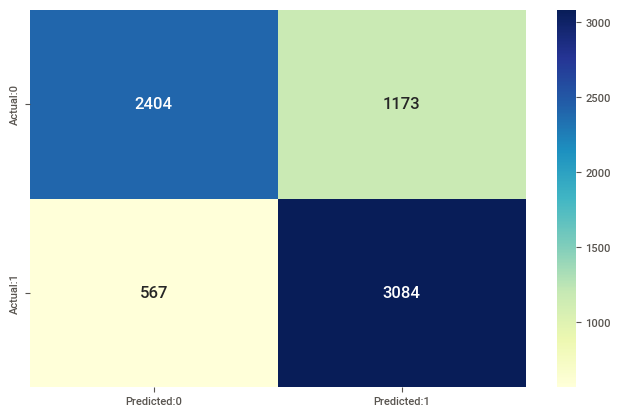

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Logistic: ROC AUC = 0.838


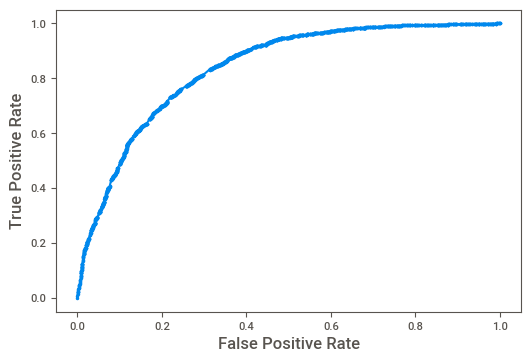

In [150]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
lr_probs = log.predict_proba(x_train)


# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)

# summarize scores
print('Logistic: ROC AUC = %.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [105]:
pd.DataFrame(zip(lr_fpr, lr_tpr), columns=('FPR', 'TPR'))

FPR       TPR
0     0.000000  0.000000
1     0.000000  0.008217
2     0.000559  0.015338
3     0.001118  0.020816
4     0.001398  0.022460
...        ...       ...
2020  0.997763  1.000000
2021  0.998602  1.000000
2022  0.999161  1.000000
2023  0.999441  1.000000
2024  1.000000  1.000000

[2025 rows x 2 columns]

In [106]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values,'Churn_Prob':lr_probs})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head(20)

Churn  Churn_Prob  CustID
0       0    0.439481    4331
1       0    0.123365    6401
2       0    0.822556    4356
3       0    0.127340    2699
4       0    0.832171    3789
5       1    0.794234    9513
6       0    0.340943    3560
7       0    0.575442    5286
8       1    0.905330    9123
9       1    0.708184    7173
10      0    0.863356    6046
11      0    0.404882     999
12      1    0.385249    7424
13      1    0.870082   10226
14      0    0.316881    4853
15      1    0.833092    8714
16      0    0.028554    6612
17      0    0.142298    5239
18      1    0.836963    7800
19      1    0.854571   10039

In [107]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(20)

Churn  Churn_Prob  CustID  predicted
0       0    0.439481    4331          0
1       0    0.123365    6401          0
2       0    0.822556    4356          1
3       0    0.127340    2699          0
4       0    0.832171    3789          1
5       1    0.794234    9513          1
6       0    0.340943    3560          0
7       0    0.575442    5286          1
8       1    0.905330    9123          1
9       1    0.708184    7173          1
10      0    0.863356    6046          1
11      0    0.404882     999          0
12      1    0.385249    7424          0
13      1    0.870082   10226          1
14      0    0.316881    4853          0
15      1    0.833092    8714          1
16      0    0.028554    6612          0
17      0    0.142298    5239          0
18      1    0.836963    7800          1
19      1    0.854571   10039          1

In [108]:
from sklearn import metrics
# Create Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[2404 1173]
 [ 567 3084]]


In [109]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7592695074709463


In [110]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_train_pred_final.head(20)

Churn  Churn_Prob  CustID  predicted
0       0    0.439481    4331          0
1       0    0.123365    6401          0
2       0    0.822556    4356          1
3       0    0.127340    2699          0
4       0    0.832171    3789          1
5       1    0.794234    9513          1
6       0    0.340943    3560          0
7       0    0.575442    5286          1
8       1    0.905330    9123          1
9       1    0.708184    7173          1
10      0    0.863356    6046          1
11      0    0.404882     999          0
12      1    0.385249    7424          0
13      1    0.870082   10226          1
14      0    0.316881    4853          0
15      1    0.833092    8714          1
16      0    0.028554    6612          0
17      0    0.142298    5239          0
18      1    0.836963    7800          1
19      1    0.854571   10039          1

In [111]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[2517 1060]
 [ 689 2962]]


In [112]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7580243497509684


In [113]:
from sklearn.metrics import precision_score, recall_score

In [114]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7364495275982098

In [115]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8112845795672419

In [116]:
x_test = x_test[cols_model]
x_test

SeniorCitizen  gender_Male  Partner_Yes  Dependents_Yes  \
2735              0            0            0               0   
5347              0            0            1               0   
9111              0            1            1               0   
3428              0            0            0               0   
6345              0            0            1               0   
...             ...          ...          ...             ...   
3798              0            1            0               0   
8535              1            0            0               0   
9355              1            0            0               0   
7195              0            1            0               0   
5299              0            0            0               0   

      MultipleLines_Yes  OnlineSecurity_Yes  OnlineBackup_Yes  \
2735                  0                   0                 0   
5347                  0                   1                 0   
9111                  1                   0                 1   
3428                  0                   1                 0   
6345                  0                   1                 1   
...                 ...                 ...               ...   
3798                  1                   0                 1   
8535                  0                   0                 1   
9355                  0                   0                 0   
7195                  1                   0                 0   
5299                  0                   1                 0   

      DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
2735                     0                0                0   
5347                     1                0                0   
9111                     0                0                0   
3428                     0                1                0   
6345                     0                1                0   
...                    ...              ...              ...   
3798                     0                0                0   
8535                     0                0                1   
9355                     1                0                1   
7195                     1                0                0   
5299                     1                1                1   

      StreamingMovies_Yes  Contract_One year  Contract_Two year  \
2735                    0                  0                  0   
5347                    0                  1                  0   
9111                    0                  0                  0   
3428                    0                  1                  0   
6345                    1                  1                  0   
...                   ...                ...                ...   
3798                    0                  0                  0   
8535                    1                  0                  0   
9355                    0                  0                  0   
7195                    0                  0                  0   
5299                    1                  0                  1   

      PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
2735                     0                                      0   
5347                     0                                      1   
9111                     1                                      0   
3428                     1                                      0   
6345                     0                                      0   
...                    ...                                    ...   
3798                     0                                      0   
8535                     1                                      0   
9355                     1                                      0   
7195                     1                                      0   
5299                     1                                      1   

      PaymentMethod_Electronic check  Pay

In [117]:
y_test_pred = log.predict(x_test)

In [118]:
list(zip(y_test_pred[:10], y_test[:10]))

[(1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0)]

In [119]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [120]:
y_pred_1.head()

0
0  1
1  0
2  1
3  0
4  0

In [121]:
y_test_df= pd.DataFrame(y_test)

In [122]:
y_test_df['CustID'] = y_test_df.index

In [123]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [124]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [125]:
lr_probs_test = log.predict_proba(x_test)
lr_probs_test = lr_probs_test[:, 1]
y_pred_final['Churn_Prob'] = lr_probs_test

In [126]:
lr_probs_test

array([0.57591965, 0.0755232 , 0.68679848, ..., 0.83226274, 0.77987105,
       0.0587801 ])

In [127]:
y_pred_final

Churn  CustID  0  Churn_Prob
0         1    2735  1    0.575920
1         0    5347  0    0.075523
2         1    9111  1    0.686798
3         0    3428  0    0.104105
4         0    6345  0    0.102535
...     ...     ... ..         ...
3093      0    3798  1    0.663715
3094      1    8535  1    0.858649
3095      1    9355  1    0.832263
3096      1    7195  1    0.779871
3097      0    5299  0    0.058780

[3098 rows x 4 columns]

In [128]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)

In [129]:
y_pred_final.head()

Churn  CustID  0  Churn_Prob  final_predicted
0      1    2735  1    0.575920                1
1      0    5347  0    0.075523                0
2      1    9111  1    0.686798                1
3      0    3428  0    0.104105                0
4      0    6345  0    0.102535                0

In [130]:
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7714654615881213

In [131]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1135,  451],
       [ 257, 1255]], dtype=int64)

In [132]:
precision_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7356389214536928

In [133]:
recall_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.830026455026455

### SVM

In [135]:
from sklearn.svm import SVC

svm = SVC(kernel='linear') 
svm.fit(x_train,y_train)
preds = svm.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.7485474499677212

In [136]:
print(confusion_matrix(y_test,preds))  

[[ 924  662]
 [ 117 1395]]


### Adaboost

In [137]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
preds = ada.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.7663008392511298

### XGBOOST 

In [139]:
# !pip install xgboost

In [140]:
from xgboost import XGBClassifier
xgbcl = XGBClassifier()
xgbcl.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
xgbcl = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)


In [142]:
 xgbcl.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [143]:
y_pred_train_xgb = xgbcl.predict(x_train)
y_pred_test_xgb = xgbcl.predict(x_test)

In [144]:
print(classification_report(y_train, y_pred_train_xgb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3577
           1       0.85      0.96      0.90      3651

    accuracy                           0.89      7228
   macro avg       0.90      0.89      0.89      7228
weighted avg       0.90      0.89      0.89      7228

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1586
           1       0.73      0.85      0.78      1512

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098



In [145]:
print("Confusion Matrix - Training :", confusion_matrix(y_train, y_pred_train_xgb))
print("*****************************"*5)
print("Confusion Matrix - Test :", confusion_matrix(y_test, y_pred_test_xgb))

Confusion Matrix - Training : [[2950  627]
 [ 144 3507]]
*************************************************************************************************************************************************
Confusion Matrix - Test : [[1111  475]
 [ 234 1278]]


In [146]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_xgb))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test_xgb))

Accuracy - Training : 0.8933314886552297
*************************************************************************************************************************************************
Accuracy - Test : 0.7711426726920594


In [147]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_test_xgb)
xgb_roc_auc

0.7728712544286316

In [148]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_xgb)

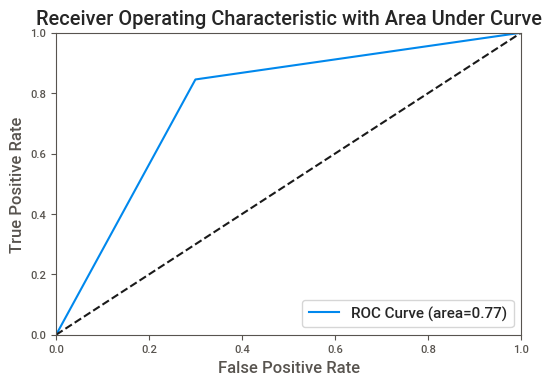

In [149]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %xgb_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()